# Process Data

In [134]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

In [135]:
# Read csv into Pandas DataFrame
csv_path1 = "Data/Starters_Dashboard.csv"
csv_path2 = "Data/Starters_Pitch_Type.csv"

starters_dashboard_df = pd.read_csv(csv_path1)
starters_pitches_df = pd.read_csv(csv_path2)

# Analysis of Basic Statistics

<AxesSubplot:xlabel='K/9', ylabel='HR/9'>

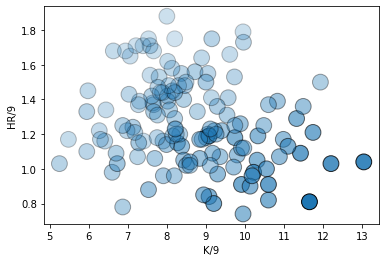

In [136]:
starters_dashboard_df.plot.scatter(x="K/9", y="HR/9", s=250,
                                   edgecolors="black", linewidth=1,
                                   alpha=(2.49/starters_dashboard_df["FIP"])**2)

### New York Mets

In [137]:
# Pull Mets starters into new DataFrame
mets_starters_df = starters_dashboard_df.loc[
    (starters_dashboard_df["Name"] == "Jacob deGrom") |
    (starters_dashboard_df["Name"] == "Max Scherzer") |
    (starters_dashboard_df["Name"] == "Carlos Carrasco") |
    (starters_dashboard_df["Name"] == "Taijuan Walker"),
    :]

mets_starters_df.head()

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,...,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,playerid
0,Jacob deGrom,NYM,47,31,0,122,122,782.1,11.65,2.05,...,80.4%,45.0%,11.3%,97.0,2.35,NaN,2.49,2.77,27.6,10954
1,Max Scherzer,- - -,65,28,0,133,133,840.1,12.20,2.12,...,81.0%,35.9%,11.1%,94.6,2.69,NaN,2.80,3.15,27.6,3137
21,Carlos Carrasco,- - -,42,30,0,98,98,573.1,10.33,2.21,...,76.1%,44.5%,14.8%,94.1,3.70,NaN,3.44,3.31,12.9,6632
111,Taijuan Walker,- - -,20,23,0,72,72,379.0,8.22,3.32,...,73.0%,44.6%,13.0%,94.0,3.75,NaN,4.36,4.47,4.4,11836


In [138]:
# Clean Mets DataFrame
mets_starters_df.loc[:, "Team"] = "NYM"
del mets_starters_df["xERA"]
del mets_starters_df["playerid"]

mets_starters_df.head()

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,FIP,xFIP,WAR
0,Jacob deGrom,NYM,47,31,0,122,122,782.1,11.65,2.05,0.81,0.282,80.4%,45.0%,11.3%,97.0,2.35,2.49,2.77,27.6
1,Max Scherzer,NYM,65,28,0,133,133,840.1,12.20,2.12,1.03,0.277,81.0%,35.9%,11.1%,94.6,2.69,2.80,3.15,27.6
21,Carlos Carrasco,NYM,42,30,0,98,98,573.1,10.33,2.21,1.19,0.312,76.1%,44.5%,14.8%,94.1,3.70,3.44,3.31,12.9
111,Taijuan Walker,NYM,20,23,0,72,72,379.0,8.22,3.32,1.23,0.269,73.0%,44.6%,13.0%,94.0,3.75,4.36,4.47,4.4


<AxesSubplot:xlabel='K/9', ylabel='BABIP'>

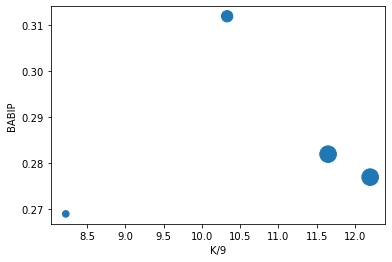

In [139]:
mets_starters_df.plot.scatter(x="K/9", y="BABIP", s=mets_starters_df["WAR"]*10)

# Analysis of Pitch Variations

### Usage Rate & Velocity

In [140]:
# Create Fastball DataFrame
fb_df = starters_pitches_df[["Name", "Team", "FB%", "FBv", "FIP"]]

# Convert FB% string (object) into a decimal float
fb_df["FB%"] = fb_df["FB%"].str.rstrip('%').astype('float') / 100.0

fb_df.head()

,Name,Team,FB%,FBv,FIP
0,Jacob deGrom,NYM,0.521,96.6,2.49
1,Max Scherzer,- - -,0.484,94.5,2.80
2,Walker Buehler,LAD,0.572,96.1,3.13
3,Clayton Kershaw,LAD,0.425,91.3,3.31
4,Justin Verlander,- - -,0.565,95.0,3.31


In [141]:
# Create Slider DataFrame
sl_df = starters_pitches_df[["Name", "Team", "SL%", "SLv", "FIP"]]

# Convert SL% string (object) into a decimal float
sl_df["SL%"] = sl_df["SL%"].str.rstrip('%').astype('float') / 100.0

sl_df.head()

,Name,Team,SL%,SLv,FIP
0,Jacob deGrom,NYM,0.277,91.4,2.49
1,Max Scherzer,- - -,0.210,85.8,2.80
2,Walker Buehler,LAD,0.137,86.2,3.13
3,Clayton Kershaw,LAD,0.404,87.7,3.31
4,Justin Verlander,- - -,0.242,87.4,3.31


In [142]:
# Create Curveball DataFrame
cb_df = starters_pitches_df[["Name", "Team", "CB%", "CBv", "FIP"]]

# Convert CB% string (object) into a decimal float
cb_df["CB%"] = cb_df["CB%"].str.rstrip('%').astype('float') / 100.0

cb_df.head()

,Name,Team,CB%,CBv,FIP
0,Jacob deGrom,NYM,0.057,82.3,2.49
1,Max Scherzer,- - -,0.086,77.7,2.80
2,Walker Buehler,LAD,0.130,80.5,3.13
3,Clayton Kershaw,LAD,0.164,73.5,3.31
4,Justin Verlander,- - -,0.159,79.9,3.31


In [143]:
# Create Changeup DataFrame
ch_df = starters_pitches_df[["Name", "Team", "CH%", "CHv", "FIP"]]

# Convert CH% string (object) into a decimal float
ch_df["CH%"] = ch_df["CH%"].str.rstrip('%').astype('float') / 100.0

ch_df.head()

,Name,Team,CH%,CHv,FIP
0,Jacob deGrom,NYM,0.144,89.5,2.49
1,Max Scherzer,- - -,0.149,84.5,2.80
2,Walker Buehler,LAD,0.028,91.1,3.13
3,Clayton Kershaw,LAD,0.007,85.7,3.31
4,Justin Verlander,- - -,0.033,87.3,3.31


<AxesSubplot:xlabel='FB%', ylabel='FBv'>

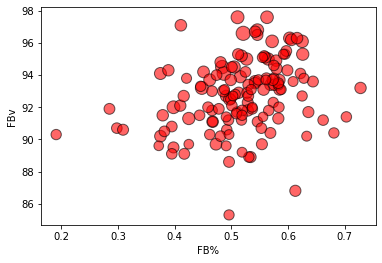

In [144]:
# Creat a Scatter Plot showing the FB% vs. FBv across the league
fb_df.plot.scatter(x="FB%", y="FBv",
                   s=500/fb_df["FIP"],
                   c="red", alpha=0.6,
                   edgecolors="black", linewidth=1)

<AxesSubplot:xlabel='SL%', ylabel='SLv'>

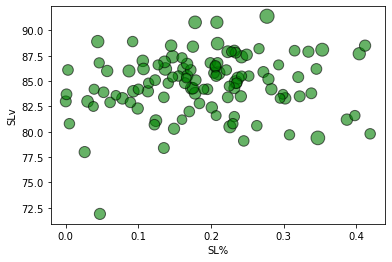

In [145]:
# Creat a Scatter Plot showing the SL% vs. SLv across the league
sl_df.plot.scatter(x="SL%", y="SLv",
                   s=500/fb_df["FIP"],
                   c="green", alpha=0.6,
                   edgecolors="black", linewidth=1)

<AxesSubplot:xlabel='CB%', ylabel='CBv'>

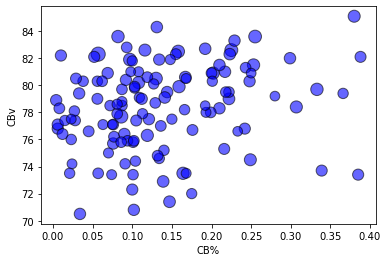

In [146]:
# Creat a Scatter Plot showing the CB% vs. CBv across the league
cb_df.plot.scatter(x="CB%", y="CBv",
                   s=500/fb_df["FIP"],
                   c="blue", alpha=0.6,
                   edgecolors="black", linewidth=1)

<AxesSubplot:xlabel='CH%', ylabel='CHv'>

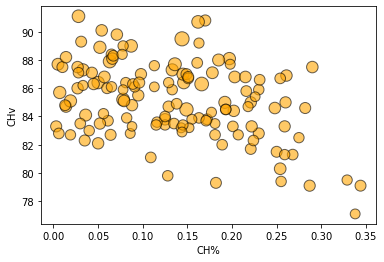

In [147]:
# Creat a Scatter Plot showing the CH% vs. CHv across the league
ch_df.plot.scatter(x="CH%", y="CHv",
                   s=500/ch_df["FIP"],
                   c="orange", alpha=0.6,
                   edgecolors="black", linewidth=1)

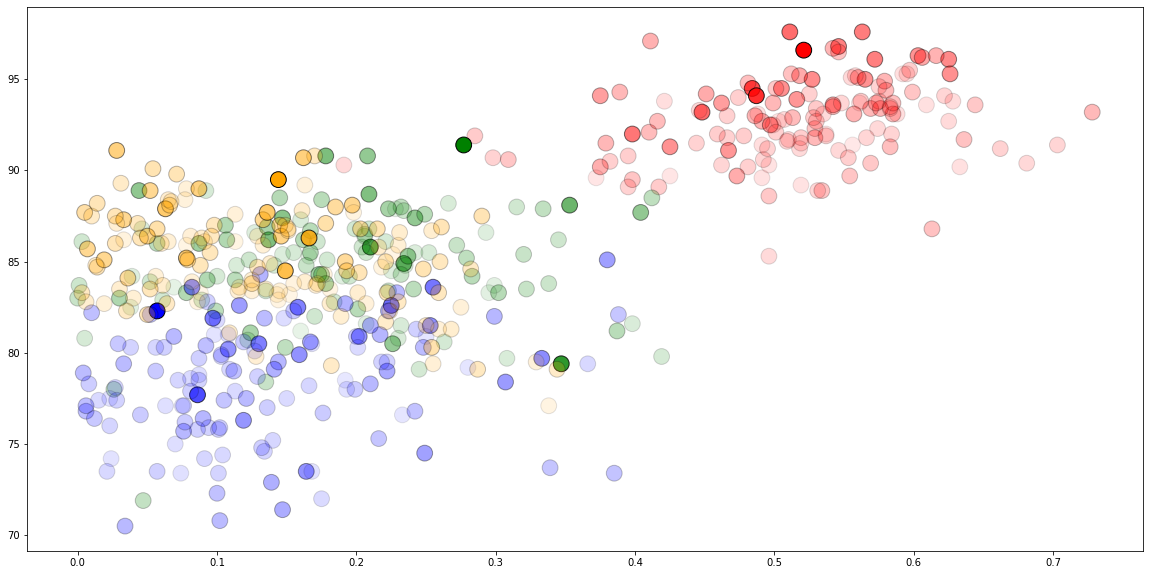

In [148]:
# Create a Scatter Plot showing the % usage and veloticty of the four main pitch types across the league
plt.figure(figsize=(20,10))

plt.scatter(fb_df["FB%"], fb_df["FBv"],
            s=250,
            c="red", alpha=(2.49/fb_df["FIP"])**3,
            edgecolors="black", linewidth=1)

plt.scatter(sl_df["SL%"], sl_df["SLv"],
            s=250,
            c="green", alpha=(2.49/sl_df["FIP"])**3,
            edgecolors="black", linewidth=1)

plt.scatter(cb_df["CB%"], cb_df["CBv"],
            s=250,
            c="blue", alpha=(2.49/cb_df["FIP"])**3,
            edgecolors="black", linewidth=1)

plt.scatter(ch_df["CH%"], ch_df["CHv"],
            s=250,
            c="orange", alpha=(2.49/ch_df["FIP"])**3,
            edgecolors="black", linewidth=1)

plt.show()

### Pitch & Velocity Variations

In [149]:
# Count the pitch types for each pitcher
pitch_counts = starters_pitches_df[["FBv", "SLv", "CTv", "CBv", "CHv", "SFv", "KNv"]].count(axis=1)

In [150]:
# Find each pitcher's velocity change from their fastest pitch to slowest
velo_diffs = (starters_pitches_df[["FBv", "SLv", "CTv", "CBv", "CHv", "SFv", "KNv"]].max(axis=1)) - (starters_pitches_df[["FBv", "SLv", "CTv", "CBv", "CHv", "SFv", "KNv"]].min(axis=1))


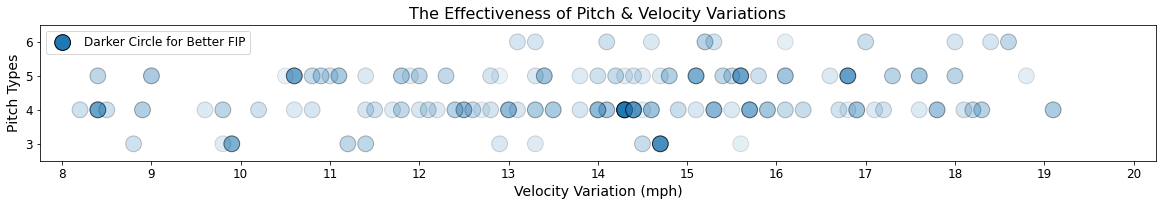

In [151]:
# create a bubble chart to help determine if there is an optimal
# number of pitch types or velocity variation for starting pitchers
plt.figure(figsize=(20,2.5))
plt.scatter(velo_diffs, pitch_counts,
            s=250,
            label="Darker Circle for Better FIP",
            edgecolors="black", linewidth=1,
            alpha=(2.49/starters_pitches_df["FIP"])**3)

# Format Titles
plt.title("The Effectiveness of Pitch & Velocity Variations", fontsize=16)
plt.xlabel("Velocity Variation (mph)", fontsize=14)
plt.ylabel("Pitch Types", fontsize=14)

# Format Axes
plt.xticks(np.arange(8, 21, step=1), fontsize=12)
plt.yticks(np.arange(pitch_counts.min(), pitch_counts.max() + 1), fontsize=12)
plt.xlim(7.75,20.25)
plt.ylim(2.5,6.5)

# Format Legend
plt.legend(fontsize=12)

# Save Chart
plt.savefig("Charts/Pitch_and_Velocity_Variation.png")

### New York Mets

In [152]:
# Pull Mets starters into new DataFrames
mets_fb_df = fb_df.loc[
    (fb_df["Name"] == "Jacob deGrom") |
    (fb_df["Name"] == "Max Scherzer") |
    (fb_df["Name"] == "Carlos Carrasco") |
    (fb_df["Name"] == "Taijuan Walker"),
    :]

mets_sl_df = sl_df.loc[
    (sl_df["Name"] == "Jacob deGrom") |
    (sl_df["Name"] == "Max Scherzer") |
    (sl_df["Name"] == "Carlos Carrasco") |
    (sl_df["Name"] == "Taijuan Walker"),
    :]

mets_cb_df = cb_df.loc[
    (cb_df["Name"] == "Jacob deGrom") |
    (cb_df["Name"] == "Max Scherzer") |
    (cb_df["Name"] == "Carlos Carrasco") |
    (cb_df["Name"] == "Taijuan Walker"),
    :]

mets_ch_df = ch_df.loc[
    (ch_df["Name"] == "Jacob deGrom") |
    (ch_df["Name"] == "Max Scherzer") |
    (ch_df["Name"] == "Carlos Carrasco") |
    (ch_df["Name"] == "Taijuan Walker"),
    :]

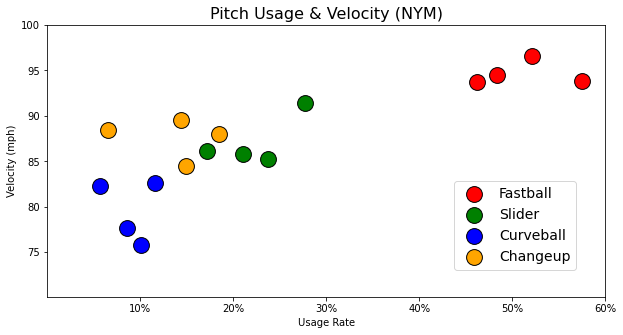

In [153]:
# Create a Scatter Plot showing the % usage and veloticty of the four main pitch types for the Mets' starters
plt.figure(figsize=(10,5))
plt.scatter(mets_fb_df["FB%"], mets_fb_df["FBv"],
            label="Fastball",
            s=250,
            c="red", #alpha=(2.49/mets_fb_df["FIP"])**1.5,
            edgecolors="black", linewidth=1)

plt.scatter(mets_sl_df["SL%"], mets_sl_df["SLv"],
            label="Slider",
            s=250,
            c="green", #alpha=(2.49/mets_sl_df["FIP"])**1.5,
            edgecolors="black", linewidth=1)

plt.scatter(mets_cb_df["CB%"], mets_cb_df["CBv"],
            label="Curveball",
            s=250,
            c="blue", #alpha=(2.49/mets_cb_df["FIP"])**1.5,
            edgecolors="black", linewidth=1)

plt.scatter(mets_ch_df["CH%"], mets_ch_df["CHv"],
            label="Changeup",
            s=250,
            c="orange", #alpha=(2.49/mets_ch_df["FIP"])**1.5,
            edgecolors="black", linewidth=1)

# Format Titles
plt.title("Pitch Usage & Velocity (NYM)", fontsize=16)
plt.xlabel("Usage Rate")
plt.ylabel("Velocity (mph)")

# Format Axes
plt.xlim(0,0.6)
plt.ylim(70.1,100)
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], ["10%", "20%", "30%", "40%", "50%", "60%"])

# Format Legend
plt.legend(fontsize=14, bbox_to_anchor=(0.48, 0, 0.48, 0.45))

# Save Chart
plt.savefig("Charts/NYM_Pitch_Usage_and_Velocity.png")